In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh
# Load drawing_utils and drawing_styles
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

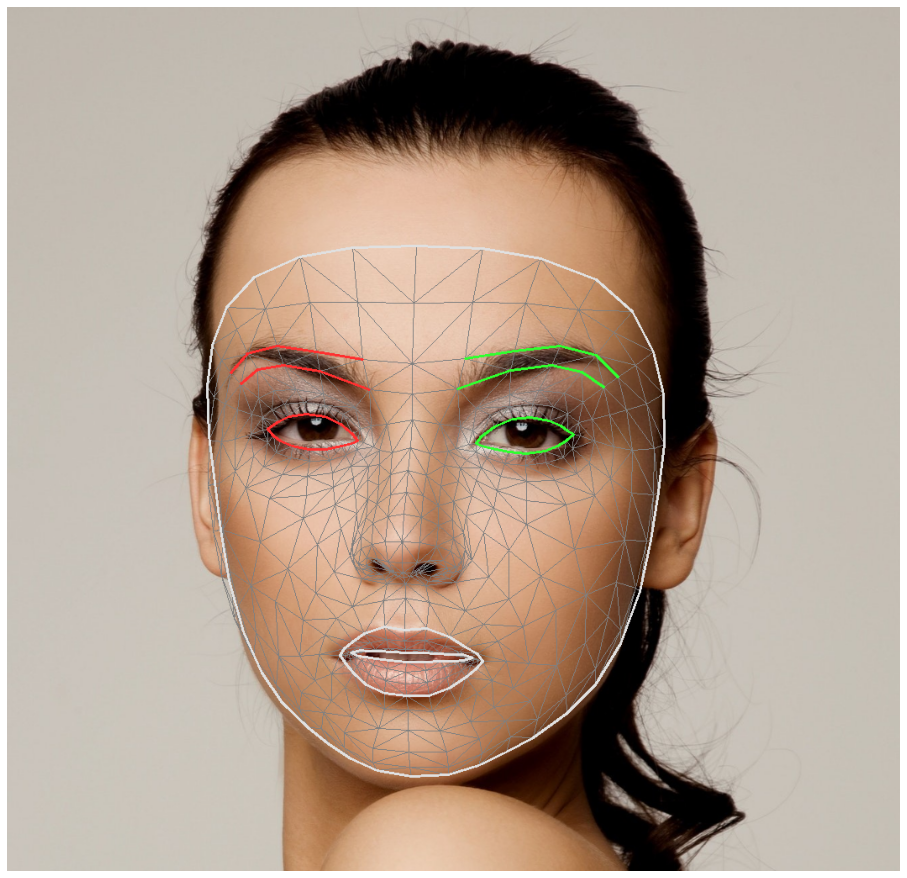

In [31]:
def draw_img(img):
    plt.figure(figsize=(16, 16))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.gca().axis("off")
# Read images with OpenCV.
image = cv2.imread("face_example2.jpg")
image = cv2.resize(image, np.multiply(image.shape[:2][::-1], 0.8).astype(int))
# Preview the images.
# Run MediaPipe Face Mesh.
with mp_face_mesh.FaceMesh(static_image_mode=True,
                           refine_landmarks=False,
                           max_num_faces=2,
                           min_detection_confidence=0.5) as face_mesh:
    # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(image=annotated_image,
                                  landmark_list=face_landmarks,
                                  connections=mp_face_mesh.FACEMESH_TESSELATION,
                                  landmark_drawing_spec=None,
                                  connection_drawing_spec=mp_drawing_styles
                                  .get_default_face_mesh_tesselation_style())
        mp_drawing.draw_landmarks(image=annotated_image,
                                  landmark_list=face_landmarks,
                                  connections=mp_face_mesh.FACEMESH_CONTOURS,
                                  landmark_drawing_spec=None,
                                  connection_drawing_spec=mp_drawing_styles
                                  .get_default_face_mesh_contours_style())
        #mp_drawing.draw_landmarks(image=annotated_image,
        #                          landmark_list=face_landmarks,
        #                          connections=mp_face_mesh.FACEMESH_IRISES,
        #                          landmark_drawing_spec=None,
        #                          connection_drawing_spec=mp_drawing_styles
        #                          .get_default_face_mesh_iris_connections_style())
    draw_img(annotated_image)

In [20]:
def get_facemesh_coords(landmark_list, img):
    h, w = img.shape[:2]
    xys = [(landmark.x, landmark.y) for landmark in landmark_list.landmark]

    return np.multiply(xys, [w, h]).astype(int)

In [21]:
my_subset = [200,
             431,
             411,
             340,
             349,
             120,
             111,
             187,
             211
            ]
lines = set(zip(my_subset, my_subset[1:]+my_subset[:1]))
lines

{(111, 187),
 (120, 111),
 (187, 211),
 (200, 431),
 (211, 200),
 (340, 349),
 (349, 120),
 (411, 340),
 (431, 411)}

In [22]:
def get_boundingbox_from_landmarks(lms):
    xy = np.min(lms, axis=0)
    wh = np.subtract(np.max(lms, axis=0), xy)
    return np.r_[xy, wh]

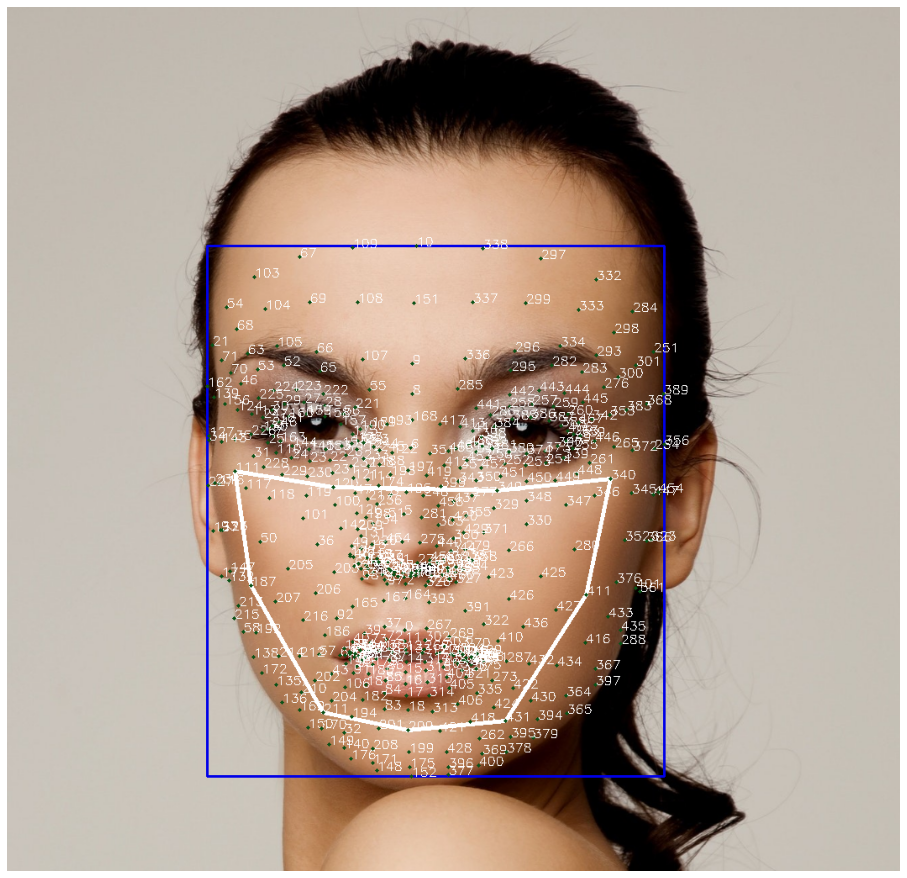

In [36]:
landmarks = get_facemesh_coords(results.multi_face_landmarks[0], image)
h, w = image.shape[:2]
img = image.copy()

contours = np.array(landmarks)[my_subset].reshape((1, -1, 1, 2))
cv2.drawContours(img, contours, 0, (255,255,255), 3, -1)

xywh = get_boundingbox_from_landmarks(landmarks)
cv2.rectangle(img, xywh[:2], xywh[:2]+xywh[2:], (232, 0, 0), 2)

for li, (x, y) in enumerate(landmarks):
    cv2.putText(img, str(li), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255))
    cv2.drawMarker(img, (x, y), (23, 82, 12), 1, 1, 3)
draw_img(img)